# **Notebook Setup**

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

In [123]:
google_drive_root='/Portfolio Projects/Classifying Exoplanets/Habitability'

In [124]:
google_drive_mount_location = '/content/drive'
google_file_prefix=google_drive_mount_location + '/My Drive/' + google_drive_root + '/'

In [125]:
from google.colab import drive
drive.mount(google_drive_mount_location)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Imports**

In [126]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

#For plotting:
%matplotlib inline
import matplotlib.pyplot as plt

#For machine learning models:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree

# **Getting the Data**

In [268]:
data = google_file_prefix + 'phl_exoplanet_catalog_2019.csv'

In [269]:
df = pd.read_csv(data)
df.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


# **Preprocessing**

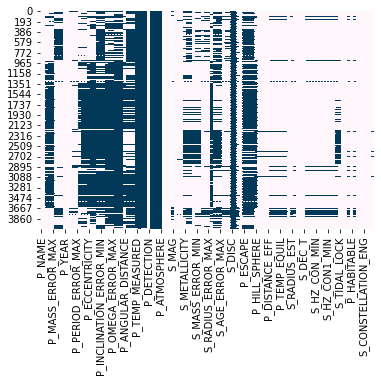

In [270]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [271]:
nullVals = df.isnull().mean().sort_values(ascending=False)
nullVals.head(50)

P_DETECTION_MASS                1.000000
P_GEO_ALBEDO                    1.000000
S_MAGNETIC_FIELD                1.000000
S_DISC                          1.000000
P_ATMOSPHERE                    1.000000
P_ALT_NAMES                     1.000000
P_DETECTION_RADIUS              1.000000
P_GEO_ALBEDO_ERROR_MIN          0.998765
P_TEMP_MEASURED                 0.998765
P_GEO_ALBEDO_ERROR_MAX          0.998765
P_TPERI_ERROR_MAX               0.883399
P_TPERI_ERROR_MIN               0.883399
P_TPERI                         0.881176
P_OMEGA_ERROR_MIN               0.828804
P_OMEGA_ERROR_MAX               0.828804
P_DENSITY                       0.825593
P_ESCAPE                        0.825593
P_POTENTIAL                     0.825593
P_GRAVITY                       0.825593
P_OMEGA                         0.815711
P_INCLINATION_ERROR_MAX         0.799901
P_INCLINATION_ERROR_MIN         0.799407
P_INCLINATION                   0.791502
P_ECCENTRICITY_ERROR_MAX        0.760128
P_ECCENTRICITY_E

In [272]:
df = df.drop(["P_DETECTION_MASS", "P_GEO_ALBEDO", "S_MAGNETIC_FIELD", "S_DISC", "P_ATMOSPHERE", "P_ALT_NAMES", "P_DETECTION_RADIUS", "P_GEO_ALBEDO_ERROR_MIN", "P_TEMP_MEASURED", "P_GEO_ALBEDO_ERROR_MAX",
              "P_TPERI_ERROR_MAX", "P_TPERI_ERROR_MIN", "P_TPERI", "P_OMEGA_ERROR_MIN", "P_OMEGA_ERROR_MAX", "P_DENSITY", "P_ESCAPE", "P_POTENTIAL", "P_GRAVITY", "P_OMEGA",
              "P_INCLINATION_ERROR_MAX", "P_INCLINATION_ERROR_MIN", "P_INCLINATION", "P_ECCENTRICITY_ERROR_MAX", "P_ECCENTRICITY_ERROR_MIN", "S_TYPE", "P_ECCENTRICITY",
              "P_IMPACT_PARAMETER_ERROR_MIN", "P_IMPACT_PARAMETER_ERROR_MAX", "P_IMPACT_PARAMETER", "P_MASS_ERROR_MAX", "P_MASS_ERROR_MIN", "P_HILL_SPHERE", 
              "P_SEMI_MAJOR_AXIS_ERROR_MIN", "P_SEMI_MAJOR_AXIS_ERROR_MAX", "P_MASS"], axis=1)

In [273]:
df.head()

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,NaN,NaN,NaN,2007,2014-05-14,326.03000,-0.32,0.32,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,NaN,NaN,NaN,2009,2018-09-06,516.21997,-3.20,3.20,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,NaN,NaN,NaN,2008,2014-05-14,185.84000,-0.23,0.23,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,NaN,NaN,NaN,2002,2018-09-06,1773.40000,-2.50,2.50,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,NaN,NaN,NaN,1996,2018-09-06,798.50000,-1.00,1.00,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [274]:
df.select_dtypes(include=['object']).isnull().sum()

P_NAME                   0
P_UPDATED                0
P_DETECTION              0
S_NAME                   0
S_ALT_NAMES              0
P_TYPE                  17
S_TYPE_TEMP            136
S_RA_T                   0
S_DEC_T                  0
P_TYPE_TEMP            327
S_CONSTELLATION          0
S_CONSTELLATION_ABR      0
S_CONSTELLATION_ENG      0
dtype: int64

In [275]:
df["P_TYPE"].isnull().sum()

17

In [276]:
df["P_TYPE"].value_counts()

Jovian         1302
Superterran    1099
Neptunian       898
Terran          673
Subterran        58
Miniterran        1
Name: P_TYPE, dtype: int64

In [277]:
df["P_TYPE"] = df["P_TYPE"].fillna(df["P_TYPE"].mode()[0])

In [278]:
df["P_TYPE_TEMP"] = df["P_TYPE_TEMP"].fillna(df["P_TYPE_TEMP"].mode()[0])
df["S_TYPE_TEMP"] = df["S_TYPE_TEMP"].fillna(df["S_TYPE_TEMP"].mode()[0])

In [279]:
df.head()

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,NaN,NaN,NaN,2007,2014-05-14,326.03000,-0.32,0.32,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,NaN,NaN,NaN,2009,2018-09-06,516.21997,-3.20,3.20,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,NaN,NaN,NaN,2008,2014-05-14,185.84000,-0.23,0.23,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,NaN,NaN,NaN,2002,2018-09-06,1773.40000,-2.50,2.50,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,NaN,NaN,NaN,1996,2018-09-06,798.50000,-1.00,1.00,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [280]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [281]:
df.head()

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,0,3.0,NaN,NaN,NaN,2007,0,326.03000,-0.32,0.32,...,0,1,0,0.083813,24,24,5,12.082709,6165.86330,1.29
1,1,3.0,NaN,NaN,NaN,2009,146,516.21997,-3.20,3.20,...,0,1,0,0.082414,83,83,42,12.229641,4684.78480,1.53
2,2,3.0,NaN,NaN,NaN,2008,0,185.84000,-0.23,0.23,...,0,1,0,0.081917,0,0,2,12.848516,1525.57440,0.83
3,3,3.0,NaN,NaN,NaN,2002,146,1773.40000,-2.50,2.50,...,0,0,0,0.145241,39,39,34,12.865261,1481.07850,2.93
4,4,3.0,NaN,NaN,NaN,1996,146,798.50000,-1.00,1.00,...,1,2,0,0.368627,30,30,75,13.421749,565.73385,1.66


In [282]:
len(df["P_RADIUS"])

4048

In [283]:
df.isnull().sum().sort_values(ascending=False)

S_AGE_ERROR_MAX       2161
S_AGE_ERROR_MIN       2161
S_AGE                 2017
P_ANGULAR_DISTANCE    1687
P_SEMI_MAJOR_AXIS     1681
                      ... 
P_STATUS                 0
P_TYPE                   0
S_DEC_T                  0
S_RA_T                   0
P_NAME                   0
Length: 76, dtype: int64

In [284]:
df.head()

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,0,3.0,NaN,NaN,NaN,2007,0,326.03000,-0.32,0.32,...,0,1,0,0.083813,24,24,5,12.082709,6165.86330,1.29
1,1,3.0,NaN,NaN,NaN,2009,146,516.21997,-3.20,3.20,...,0,1,0,0.082414,83,83,42,12.229641,4684.78480,1.53
2,2,3.0,NaN,NaN,NaN,2008,0,185.84000,-0.23,0.23,...,0,1,0,0.081917,0,0,2,12.848516,1525.57440,0.83
3,3,3.0,NaN,NaN,NaN,2002,146,1773.40000,-2.50,2.50,...,0,0,0,0.145241,39,39,34,12.865261,1481.07850,2.93
4,4,3.0,NaN,NaN,NaN,1996,146,798.50000,-1.00,1.00,...,1,2,0,0.368627,30,30,75,13.421749,565.73385,1.66


In [285]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

imp = IterativeImputer(max_iter=10, verbose=0)
imp.fit(df)
imputed_df = imp.transform(df)
imputed_df = pd.DataFrame(imputed_df, columns=df.columns)

In [286]:
imputed_df.isna().sum().sort_values(ascending=False)

P_NAME                     0
S_RADIUS_EST               0
S_HZ_OPT_MAX               0
S_HZ_OPT_MIN               0
S_LUMINOSITY               0
                          ..
S_MASS_ERROR_MIN           0
S_MASS                     0
S_METALLICITY_ERROR_MAX    0
S_METALLICITY_ERROR_MIN    0
P_SEMI_MAJOR_AXIS_EST      0
Length: 76, dtype: int64

In [287]:
imputed_df.head(20)

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,0.0,3.0,4.798394,9.908788,-1.895067,2007.0,0.0,326.030000,-0.320000,0.320000,...,0.0,1.0,0.0,0.083813,24.0,24.0,5.0,12.082709,6165.86330,1.290000
1,1.0,3.0,4.798394,9.908788,-1.895067,2009.0,146.0,516.219970,-3.200000,3.200000,...,0.0,1.0,0.0,0.082414,83.0,83.0,42.0,12.229641,4684.78480,1.530000
2,2.0,3.0,4.798394,9.908788,-1.895067,2008.0,0.0,185.840000,-0.230000,0.230000,...,0.0,1.0,0.0,0.081917,0.0,0.0,2.0,12.848516,1525.57440,0.830000
3,3.0,3.0,4.798394,9.908788,-1.895067,2002.0,146.0,1773.400000,-2.500000,2.500000,...,0.0,0.0,0.0,0.145241,39.0,39.0,34.0,12.865261,1481.07850,2.930000
4,4.0,3.0,4.798394,9.908788,-1.895067,1996.0,146.0,798.500000,-1.000000,1.000000,...,1.0,2.0,0.0,0.368627,30.0,30.0,75.0,13.421749,565.73385,1.660000
5,5.0,3.0,4.798394,9.908788,-1.895067,2008.0,0.0,993.300000,-3.200000,3.200000,...,0.0,1.0,0.0,0.216174,31.0,31.0,22.0,12.424038,3273.62840,2.600000
6,6.0,3.0,4.798394,9.908788,-1.895067,2008.0,29.0,2308.316188,-1074.360940,1043.993867,...,0.0,1.0,0.0,0.253128,72.0,71.0,63.0,12.562950,2542.62400,330.000000
7,7.0,3.0,4.798394,9.908788,-1.895067,2018.0,136.0,30.350600,-0.007700,0.007800,...,0.0,1.0,0.0,0.065685,8.0,8.0,35.0,13.823874,289.22348,0.190000
8,8.0,3.0,4.798394,9.908788,-1.895067,2010.0,0.0,452.800000,-4.500000,2.100000,...,0.0,1.0,0.0,0.177304,76.0,74.0,68.0,13.356050,632.47773,1.333000
9,9.0,3.0,4.798394,9.908788,-1.895067,2010.0,0.0,883.000000,-13.800000,32.400000,...,0.0,1.0,0.0,0.272478,76.0,74.0,68.0,13.858291,273.33208,2.080000


In [288]:
imputed_df["P_HABITABLE"].value_counts()

0.0    3993
2.0      34
1.0      21
Name: P_HABITABLE, dtype: int64

In [289]:
imputed_df

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,0.0,3.0,4.798394,9.908788,-1.895067,2007.0,0.0,326.030000,-0.3200,0.3200,...,0.0,1.0,0.0,0.083813,24.0,24.0,5.0,12.082709,6165.863300,1.29000
1,1.0,3.0,4.798394,9.908788,-1.895067,2009.0,146.0,516.219970,-3.2000,3.2000,...,0.0,1.0,0.0,0.082414,83.0,83.0,42.0,12.229641,4684.784800,1.53000
2,2.0,3.0,4.798394,9.908788,-1.895067,2008.0,0.0,185.840000,-0.2300,0.2300,...,0.0,1.0,0.0,0.081917,0.0,0.0,2.0,12.848516,1525.574400,0.83000
3,3.0,3.0,4.798394,9.908788,-1.895067,2002.0,146.0,1773.400000,-2.5000,2.5000,...,0.0,0.0,0.0,0.145241,39.0,39.0,34.0,12.865261,1481.078500,2.93000
4,4.0,3.0,4.798394,9.908788,-1.895067,1996.0,146.0,798.500000,-1.0000,1.0000,...,1.0,2.0,0.0,0.368627,30.0,30.0,75.0,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,1194.0,3.0,1.870000,0.450000,0.200000,2019.0,182.0,28.165600,0.0028,0.0027,...,0.0,2.0,2.0,0.755038,85.0,85.0,82.0,1.870000,4.155456,0.13456
4044,1195.0,3.0,2.760000,9.908788,-1.895067,2019.0,182.0,7.906961,0.0000,0.0000,...,0.0,1.0,0.0,0.363831,85.0,85.0,82.0,2.760000,8.047485,0.05769
4045,129.0,3.0,4.798394,9.908788,-1.895067,2019.0,183.0,3.204000,0.0010,0.0010,...,0.0,1.0,0.0,0.588562,40.0,40.0,56.0,1.102775,1.380000,0.02100
4046,130.0,3.0,4.798394,9.908788,-1.895067,2019.0,183.0,6.689000,0.0050,0.0050,...,0.0,2.0,1.0,0.879042,40.0,40.0,56.0,1.178333,1.750000,0.03500


In [290]:
#Handling class imbalance with SMOTE algorithm
from imblearn.over_sampling import SMOTE

seed = 100
k = 5

X = imputed_df.loc[:, df.columns != "P_HABITABLE"]
y = imputed_df["P_HABITABLE"]

smote = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = smote.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
df.head()

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST,P_HABITABLE
0,0.0,3.0,4.798394,9.908788,-1.895067,2007.0,0.0,326.03000,-0.32,0.32,...,0.0,1.0,0.083813,24.0,24.0,5.0,12.082709,6165.86330,1.29,0.0
1,1.0,3.0,4.798394,9.908788,-1.895067,2009.0,146.0,516.21997,-3.20,3.20,...,0.0,1.0,0.082414,83.0,83.0,42.0,12.229641,4684.78480,1.53,0.0
2,2.0,3.0,4.798394,9.908788,-1.895067,2008.0,0.0,185.84000,-0.23,0.23,...,0.0,1.0,0.081917,0.0,0.0,2.0,12.848516,1525.57440,0.83,0.0
3,3.0,3.0,4.798394,9.908788,-1.895067,2002.0,146.0,1773.40000,-2.50,2.50,...,0.0,0.0,0.145241,39.0,39.0,34.0,12.865261,1481.07850,2.93,0.0
4,4.0,3.0,4.798394,9.908788,-1.895067,1996.0,146.0,798.50000,-1.00,1.00,...,1.0,2.0,0.368627,30.0,30.0,75.0,13.421749,565.73385,1.66,0.0


In [291]:
df["P_HABITABLE"].value_counts()

0.0    3993
2.0    3993
1.0    3993
Name: P_HABITABLE, dtype: int64

In [292]:
pal = sns.choose_diverging_palette() #244, 343

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

<ipython-input-293-d4f80175c484>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


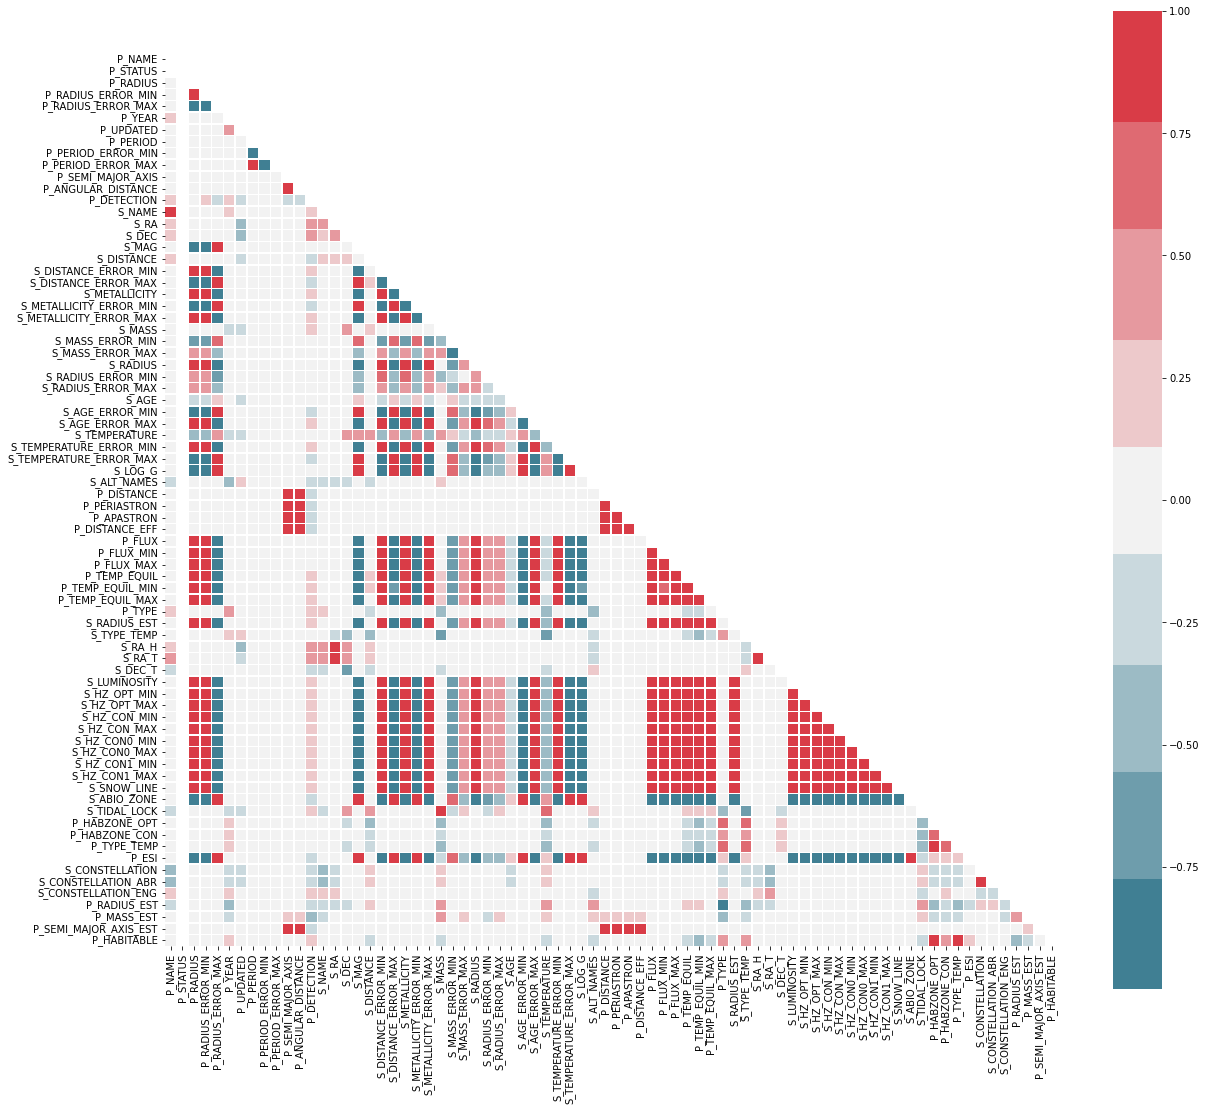

In [293]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(287, 0, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=pal, vmax=None, center=0,square=True, annot=False, linewidths=.5, cbar_kws={"shrink": 0.9})

In [294]:
working_data = df.drop(['S_NAME', 'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_DISTANCE', 'P_PERIASTRON', 'P_APASTRON', 
                                 'P_DISTANCE_EFF', 'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 
                                 'S_RADIUS_EST', 'S_RA_H', 'S_RA_T', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 
                                 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE', 
                                'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_MAG', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 
                                 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_AGE', 'S_TEMPERATURE_ERROR_MIN', 
                                 'S_TEMPERATURE_ERROR_MAX', 'S_ABIO_ZONE', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST'], axis=1)

<ipython-input-295-1ada7a516de4>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


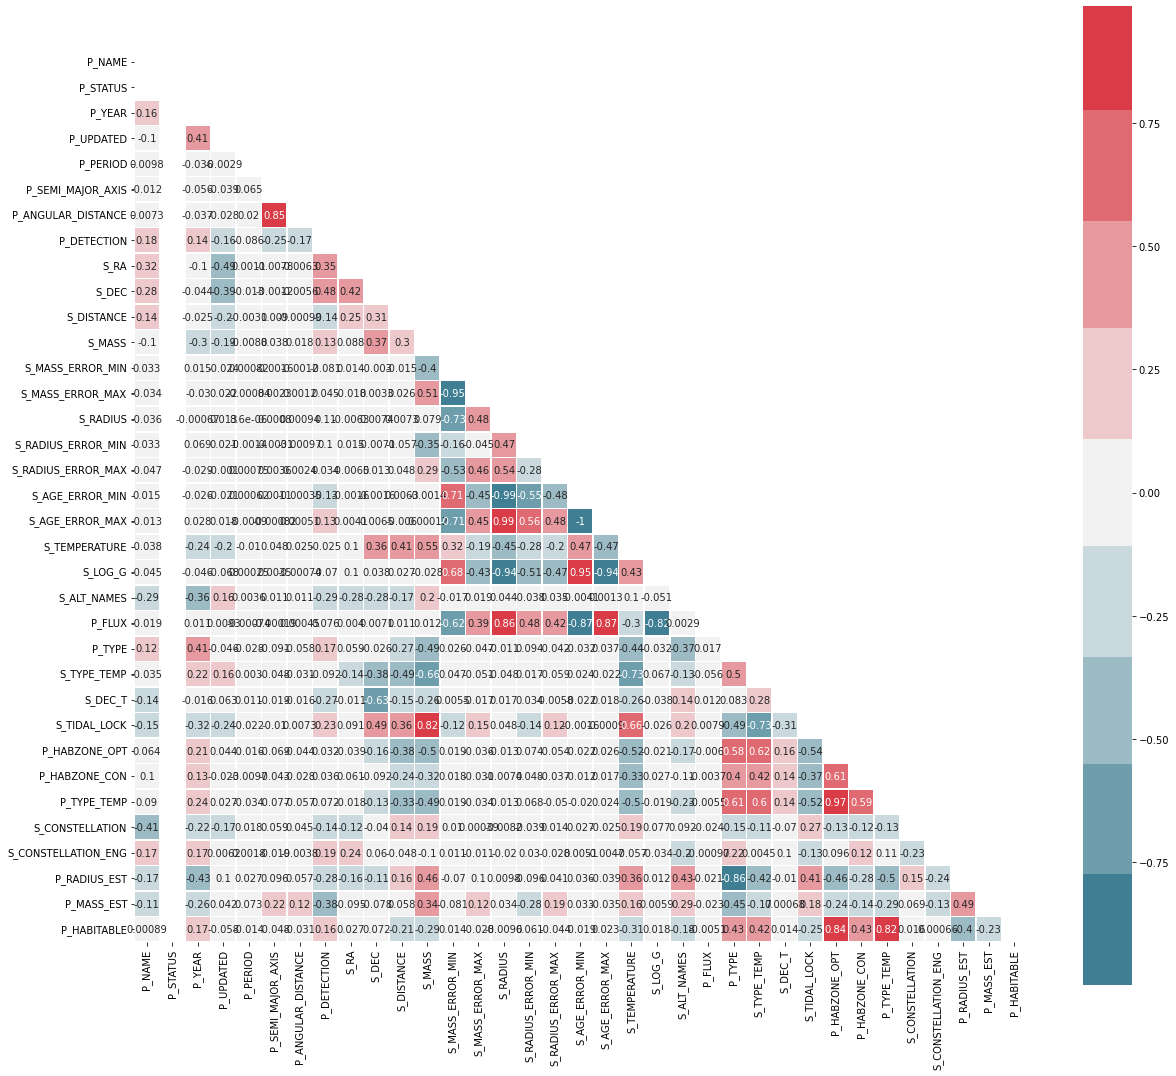

In [295]:
corr = working_data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=pal, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": 0.9})

In [296]:
# Detecting outliers with IQR
Q1 = working_data.quantile(0.25)
Q3 = working_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

P_NAME                 1958.329143
P_STATUS                  0.000000
P_YEAR                    2.374265
P_UPDATED                65.315787
P_PERIOD                111.377757
P_SEMI_MAJOR_AXIS         4.767708
P_ANGULAR_DISTANCE      138.176939
P_DETECTION               0.694187
S_RA                     99.883554
S_DEC                    51.685790
S_DISTANCE              498.942401
S_MASS                    0.630000
S_MASS_ERROR_MIN          0.065328
S_MASS_ERROR_MAX          0.067875
S_RADIUS                  0.576198
S_RADIUS_ERROR_MIN        0.070000
S_RADIUS_ERROR_MAX        0.110000
S_AGE_ERROR_MIN           0.778509
S_AGE_ERROR_MAX           1.307915
S_TEMPERATURE          1983.434102
S_LOG_G                   0.313926
S_ALT_NAMES               6.534462
P_FLUX                   15.120122
P_TYPE                    1.000000
S_TYPE_TEMP               2.000000
S_DEC_T                1370.760382
S_TIDAL_LOCK              0.144250
P_HABZONE_OPT             1.000000
P_HABZONE_CON       

In [297]:
working_data = working_data[~((working_data < (Q1 - 1.5 * IQR)) |(working_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [298]:
working_data

,P_NAME,P_STATUS,P_YEAR,P_UPDATED,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ANGULAR_DISTANCE,P_DETECTION,S_RA,S_DEC,...,S_DEC_T,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,S_CONSTELLATION,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_HABITABLE
113,113.000000,3.0,2016.000000,115.000000,21.169861,0.131000,0.700000,8.0,130.410370,17.640005,...,258.000000,0.401667,0.0,0.000000,1.0,11.000000,18.000000,1.984170,4.595314,0.0
134,137.000000,3.0,2018.000000,154.000000,3.651100,0.026000,2.540000,7.0,333.428680,-17.685771,...,2506.000000,0.260481,0.0,0.000000,1.0,3.000000,83.000000,2.626754,7.399036,0.0
151,154.000000,3.0,2017.000000,95.000000,48.134500,0.193940,9.600000,7.0,67.148820,-25.169301,...,2614.000000,0.345489,1.0,1.000000,2.0,35.000000,60.000000,2.668393,7.599268,2.0
152,155.000000,3.0,2017.000000,95.000000,13.254300,0.082080,4.060000,7.0,67.148820,-25.169301,...,2614.000000,0.345489,0.0,0.000000,1.0,35.000000,60.000000,1.626761,3.279985,0.0
153,156.000000,3.0,2017.000000,95.000000,5.363600,0.032820,6.170000,7.0,75.489280,-6.946263,...,2353.000000,0.250452,1.0,0.000000,2.0,35.000000,60.000000,1.226695,2.021386,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11973,2589.148062,3.0,2014.000000,35.580878,42.433323,0.195023,0.715854,8.0,285.870265,49.320230,...,2000.605942,0.380311,1.0,0.000000,2.0,33.000000,24.000000,1.711172,3.677292,2.0
11974,157.772339,3.0,2017.943085,134.609560,51.683564,0.198684,15.258509,7.0,103.390624,-23.514893,...,2585.707457,0.334409,1.0,1.000000,2.0,37.829254,71.317017,2.515530,6.891884,2.0
11975,2178.557088,3.0,2016.825053,108.902750,60.965248,1.295967,34.328892,8.0,294.876735,49.792140,...,2053.304443,0.331208,1.0,1.000000,2.0,30.000000,75.000000,1.634409,3.309588,2.0
11976,2588.197057,3.0,2014.000000,44.000000,39.895031,0.185947,0.823276,8.0,286.540010,49.437326,...,2014.000000,0.366163,1.0,0.197057,2.0,33.000000,24.000000,1.579785,3.129912,2.0


In [299]:
working_data["P_STATUS"].value_counts()

3.0    4706
Name: P_STATUS, dtype: int64

In [300]:
working_data = working_data.drop("P_STATUS", axis=1)

# **Splitting into Train/Test**

In [301]:
X = working_data.loc[:, working_data.columns != "P_HABITABLE"]
y = working_data["P_HABITABLE"]

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.25, 
                     random_state=1)
#Prints the ratio of training to testing data. 
print("Training/testing: ", len(X_train), "/", len(X_test))

Training/testing:  3529 / 1177


In [302]:
# Scaling X
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler() #Creates the standard scaler object
#Standardizes the training and test data. 
stdsc.fit(X_train)
X_train = pd.DataFrame(stdsc.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(stdsc.transform(X_test), index=X_test.index, columns=X_test.columns)
#X_train = stdsc.fit_transform(X_train)
#X_train = pd.DataFrame(X_train, index=X_train.index, columns = X_train.columns)
#X_test_std = stdsc.transform(X_test)
#X_test = pd.DataFrame(X_test, index=X_test.index, columns = X_test.columns)
#Prints the results of the transformation. 
X_train

,P_NAME,P_YEAR,P_UPDATED,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ANGULAR_DISTANCE,P_DETECTION,S_RA,S_DEC,S_DISTANCE,...,S_TYPE_TEMP,S_DEC_T,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,S_CONSTELLATION,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST
11593,-0.451769,0.376815,-0.013363,1.454649,2.102761,2.107666,0.508824,0.477014,1.020951,1.146153,...,-1.496374,0.204259,0.872835,0.234537,0.381804,0.232639,-0.130561,0.815746,0.471470,0.342152
11166,-1.804477,1.434199,2.547419,-0.399611,-0.603168,-0.443724,-1.647268,-1.423922,-1.302912,-0.911536,...,0.718165,0.041989,-0.080685,0.234537,0.245885,0.232639,0.543616,0.411814,1.281446,1.612447
4147,0.449364,0.203022,0.205744,0.184084,-0.554943,-0.577377,-0.685861,-0.692009,0.495104,-0.474983,...,0.718165,-1.074108,-0.160367,0.234537,1.131967,0.232639,-0.584343,0.485675,-1.077585,-1.024462
4869,1.410297,0.919524,0.526747,-0.967628,-0.665670,-0.517481,-0.232185,0.768459,-1.567262,-0.958289,...,0.718165,1.180236,-1.580907,0.234537,1.131967,0.232639,-1.413853,0.366200,-1.398244,-1.361065
8315,-1.474389,0.346297,2.416967,-0.525959,-0.613232,-0.544059,-0.307296,-1.274191,-0.847990,-0.858898,...,0.718165,-1.319427,-0.050110,0.234537,-0.697378,0.232639,0.628443,-0.583127,1.297308,2.128740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117,-0.521265,0.376815,-0.013363,2.155462,2.102761,2.107666,0.508824,0.460953,0.968687,2.679171,...,-2.657482,-0.051570,1.418847,0.234537,-1.271879,0.232639,-0.130561,0.815746,0.744093,0.600620
8925,-0.188944,0.376815,-0.013363,2.775291,2.102761,2.107666,0.508824,0.370277,0.845488,2.705605,...,-3.159329,-0.703294,1.405804,0.234537,-1.271879,0.232639,0.666922,-0.261526,0.971995,0.828206
5360,-1.022713,0.660440,0.675278,-0.941338,-0.658603,-0.509019,-2.906010,-1.800898,-1.213951,-0.981684,...,0.718165,1.071692,-0.805353,0.234537,-1.271879,0.232639,0.506849,0.053183,-0.627134,-0.582284
10830,0.063935,-2.609864,-1.339982,2.298682,-0.380389,-0.605874,0.508824,0.367727,1.040460,-0.076133,...,-1.880049,0.324910,1.322766,0.234537,1.131967,0.232639,-0.093220,0.123152,1.076133,0.944132


# **Feature Selection**

 1) S_TEMPERATURE_ERROR_MIN        0.167863
 2) S_MASS                         0.144977
 3) S_TEMPERATURE                  0.133456
 4) S_DISTANCE_ERROR_MAX           0.068635
 5) S_METALLICITY_ERROR_MAX        0.052065
 6) P_ANGULAR_DISTANCE             0.049563
 7) S_RADIUS_ERROR_MIN             0.042349
 8) S_AGE                          0.041104
 9) S_AGE_ERROR_MIN                0.039901
10) S_RA                           0.039763
11) P_YEAR                         0.038813
12) P_RADIUS_ERROR_MAX             0.030937
13) S_RADIUS                       0.026588
14) S_NAME                         0.019879
15) P_SEMI_MAJOR_AXIS              0.014220
16) P_UPDATED                      0.011121
17) P_DETECTION                    0.010570
18) P_PERIOD_ERROR_MIN             0.010292
19) S_DEC                          0.009448
20) S_MAG                          0.006843
21) S_RADIUS_ERROR_MAX             0.005728
22) P_PERIOD                       0.005569
23) P_PERIOD_ERROR_MAX          

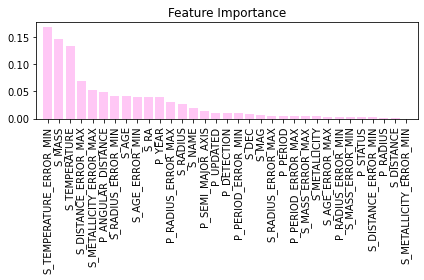

In [303]:
#Sets the column labels
feat_labels = df.columns[1:]

#Creates a Random Forest Classifier with 500 estimators. 
forest = RandomForestClassifier(n_estimators=500, random_state=1)

#Fits the forest to the training data. 
forest.fit(X_train, y_train)
#Sets the importances of the features. 
importances = forest.feature_importances_

#Sets the indices relative to the importances. 
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
  #Prints the importances and labels (in order of importance)
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
#Creates a bar chart depicting this data. 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center',
        color="#ffc7f5")

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [304]:
from sklearn.feature_selection import SelectFromModel

#Creates the select from model object using the forest from above and 
#the desired threshold. 
sfm = SelectFromModel(forest, threshold=0.01, prefit=True)
#Gets the desired feature columns from the standardized data. 
X_selected_train = pd.DataFrame(sfm.transform(X_train))
X_selected_test = pd.DataFrame(sfm.transform(X_test))
#Creates dataframes from the selected train and test data.
A = pd.DataFrame(X_selected_train)
B = pd.DataFrame(X_selected_test)
#Sets the column names of these dataframes for viewability. 
A.columns = X_selected_train.columns
#B.columns = A.columns
#Prints the number of features that meet the threshold for the training and 
#testing data. 
print('Number of training features that meet this threshold criterion:', 
      X_selected_train.shape[1])
print('Number of test features that meet the threshold criteria: ',
      X_selected_test.shape[1])

Number of training features that meet this threshold criterion: 18
Number of test features that meet the threshold criteria:  18


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [305]:
features = X_train.loc[:,sfm.get_support()].columns
A.columns = features

In [306]:
A

,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ANGULAR_DISTANCE,S_RA,S_DISTANCE,S_MASS,S_MASS_ERROR_MIN,S_MASS_ERROR_MAX,S_RADIUS,S_TEMPERATURE,P_FLUX,P_TYPE,S_TIDAL_LOCK,P_HABZONE_OPT,P_TYPE_TEMP,S_CONSTELLATION,P_RADIUS_EST,P_MASS_EST
0,1.454649,2.102761,2.107666,0.477014,1.146153,1.151393,0.386854,-0.511218,0.907680,1.427674,-0.172224,-0.629807,0.872835,0.234537,0.232639,-0.130561,0.471470,0.342152
1,-0.399611,-0.603168,-0.443724,-1.423922,-0.911536,-0.496812,0.713216,-0.631410,-0.451564,-0.384343,-0.264809,-0.629807,-0.080685,0.234537,0.232639,0.543616,1.281446,1.612447
2,0.184084,-0.554943,-0.577377,-0.692009,-0.474983,-0.375515,0.947206,-0.845964,-0.414930,-0.419806,-0.348765,1.333684,-0.160367,0.234537,0.232639,-0.584343,-1.077585,-1.024462
3,-0.967628,-0.665670,-0.517481,0.768459,-0.958289,-1.388384,1.131763,-1.015190,-1.273802,-1.354757,-0.248407,1.333684,-1.580907,0.234537,0.232639,-1.413853,-1.398244,-1.361065
4,-0.525959,-0.613232,-0.544059,-1.274191,-0.858898,-0.469764,0.267660,-0.222863,-0.358030,-0.406585,-0.194568,-0.629807,-0.050110,0.234537,0.232639,0.628443,1.297308,2.128740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3524,2.155462,2.102761,2.107666,0.460953,2.679171,1.450601,-0.138984,0.025965,1.306041,1.999965,-0.096784,-0.629807,1.418847,0.234537,0.232639,-0.130561,0.744093,0.600620
3525,2.775291,2.102761,2.107666,0.370277,2.705605,1.633242,-0.226262,0.539602,1.565417,2.151379,-0.077545,-0.629807,1.405804,0.234537,0.232639,0.666922,0.971995,0.828206
3526,-0.941338,-0.658603,-0.509019,-1.800898,-0.981684,-1.010233,-2.810978,2.674717,-1.097461,-0.708202,-0.102780,1.333684,-0.805353,0.234537,0.232639,0.506849,-0.627134,-0.582284
3527,2.298682,-0.380389,-0.605874,0.367727,-0.076133,1.275991,-0.483708,0.346200,1.247800,1.530135,-0.170138,-0.629807,1.322766,0.234537,0.232639,-0.093220,1.076133,0.944132


In [307]:
B.columns = A.columns
B.head()

,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ANGULAR_DISTANCE,S_RA,S_DISTANCE,S_MASS,S_MASS_ERROR_MIN,S_MASS_ERROR_MAX,S_RADIUS,S_TEMPERATURE,P_FLUX,P_TYPE,S_TIDAL_LOCK,P_HABZONE_OPT,P_TYPE_TEMP,S_CONSTELLATION,P_RADIUS_EST,P_MASS_EST
0,-0.946099,-0.662098,-0.634571,1.105837,-0.888037,-1.266133,0.604048,-0.591795,-1.122409,-1.260643,-0.123643,-1.680759,-1.368872,0.234537,0.232639,-1.589765,-1.513834,-1.329788
1,1.153529,2.102761,2.107666,0.356519,1.106715,1.057360,0.280159,-0.494613,0.814889,1.273245,-0.166300,-0.629807,0.828553,0.234537,0.232639,1.004376,1.520492,1.405736
2,-0.602185,-0.618894,-0.607005,-1.117949,-0.789235,-0.432685,-0.052200,0.048196,-0.290883,-0.405860,-0.147165,-0.629807,-0.011084,0.234537,0.232639,0.652413,1.238166,2.324067
3,-0.551255,0.532006,0.532886,-0.480742,-0.046969,-0.173814,-1.344850,1.255704,-0.219374,-0.144819,-0.078865,-0.629807,-0.351299,0.234537,0.232639,2.056266,0.706399,0.569420
4,-0.109504,0.014243,0.309626,0.095277,-0.732393,-0.394290,0.720508,-0.696499,3.150769,-0.431492,-0.307808,1.333684,-0.429050,0.234537,0.232639,1.630006,-0.542053,-0.530213


# **Training**

In [308]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "Logistic Regression": LogisticRegression(random_state=0, max_iter=10),
    "Decision Tree": tree.DecisionTreeClassifier(max_depth = 5),
    "Random Forest": RandomForestClassifier(n_estimators=5),
    "Support Vector": SVC(),
    "KNN": KNeighborsClassifier(),
    "SGD": SGDClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
  }

#for name, model in models.items():
 # model.fit(X_train, y_train)
  #print(name + " trained")

In [257]:
#Results
def getClassification(y_test, y_pred, positive_label=1):
  #TP, FN, FP, TN categories
  tp = 0
  tn = 0
  fn = 0
  fp = 0

  for y_t, y_p in zip(y_test, y_pred):
    if y_t == 1 or y_t == 2:
      if y_p == 1 or y_p == 2:
        tp += 1
      else:
        fn += 1
    else:
      if y_p == 1 or y_p == 2:
        fp += 1
      else:
        tn += 1
  
  return tp, fn, fp, tn

In [258]:
def getAccuracy(tp, fn, fp, tn):
  acc = (tp + tn)/(tp + tn + fp + fn)
  return acc

In [259]:
def getPrecision(tp, fn, fp, tn):
  precision = tp/(tp + fp)
  return precision

In [260]:
def getRecall(tp, fn, fp, tn):
  recall = tp/(tp + fn)
  return recall

In [261]:
def getF1(tp, fn, fp, tn):
  recall = getRecall(tp, fn, fp, tn)
  precision = getPrecision(tp, fn, fp, tn)
  f1 = (2*precision*recall)/(precision + recall)
  return f1

In [262]:
for name, model in models.items():
  y_pred = model.predict(X_test)
  print(name + " Accuracy: {:.3f}%".format(getAccuracy(*getClassification(y_test, y_pred)) * 100) + " F1 Score: {:.3f}%".format(getF1(*getClassification(y_test, y_pred))*100))

Logistic Regression Accuracy: 100.000% F1 Score: 100.000%
Decision Tree Accuracy: 100.000% F1 Score: 100.000%
Random Forest Accuracy: 100.000% F1 Score: 100.000%
Support Vector Accuracy: 100.000% F1 Score: 100.000%
KNN Accuracy: 100.000% F1 Score: 100.000%
SGD Accuracy: 100.000% F1 Score: 100.000%
Gradient Boosting Accuracy: 100.000% F1 Score: 100.000%


In [309]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(),X_train,y_train,cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1. 1. 1. 1. 1.]
Accuracy: 1.00 (+/- 0.00)


# **Model Comparison**

In [263]:
classifier = RandomForestClassifier(n_estimators=300, random_state=0)
grid_param = {
    'n_estimators': [100, 200, 500, 900],
    'criterion': ['gini'],
    'bootstrap': [True, False],
    'random_state': [0, 1, 3]
}
gs = GridSearchCV(estimator=classifier,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)
gs.fit(A, y_train)
best_parameters = gs.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100, 'random_state': 0}


In [310]:
best_result = gs.best_score_
print(best_result)

1.0
